In [9]:
from PyDMTGraph.dmtgraph import DMTGraph
from PyDMTGraph.helper import plotGraph

In [10]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
# helper functions to preprocess images
def blur(im, n_itr=5):
    im_blur = np.copy(im)
    for _ in range(n_itr):
        im_blur = cv2.GaussianBlur(im_blur, (3,3), 0)
    return im_blur

def sharpen(im, n_itr=5):
    kernel = 1/34 * np.array([[ 0,  0, -1,  0,  0],
                              [ 0, -1, -2, -1,  0],
                              [-1, -2, 17, -2, -1],
                              [ 0, -1, -2, -1,  0],
                              [ 0,  0, -1,  0,  0]])
    im_sharpen = np.copy(im)
    for _ in range(n_itr):
        im_sharpen += np.abs(cv2.filter2D(im_sharpen, -1, kernel))

    return im_sharpen

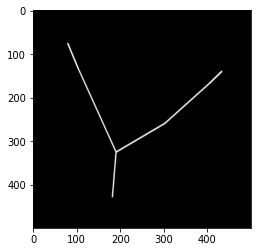

In [12]:
img = cv2.imread("../GraphData/1.png", cv2.IMREAD_GRAYSCALE).astype(np.double)
img = cv2.resize(img, (500, 500))
plt.imshow(img, cmap="gray")

In [13]:
img = sharpen(img)
img = blur(img)

In [14]:
G = DMTGraph(img)

In [17]:
vertices, edges = G.computeGraph(0.5, 0.0)

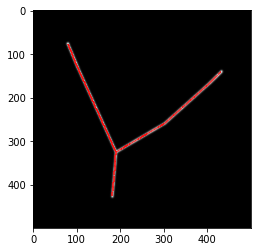

In [19]:
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")
plotGraph(ax, vertices, edges)